# Preprocessing
After collecting the original data, I applied a bandpass filter from 20-200 hz and notch filters at 60, 120, and 180 hz. I then extracted 2 second oral preparation and swallow signals from the data using visual inspection. Within the data directory, each folder name is the substance name and the volume swallowed (if applicable) of the data contained within it.

In [ ]:
import os
import pandas as pd
import random
import shutil

os.chdir("..") 
from src import feature_extraction, models, utils, results

data_path = r'C:\Users\chloe\OneDrive\Desktop\swallow EMG\data\participants\1\extracted signals'
class_folders = os.listdir(data_path)
example_class = class_folders[0]
example_files = os.listdir(os.path.join(data_path, example_class))

# File organization
print(class_folders)
print(example_class)
print(example_files)

['apple 10', 'apple 20', 'carrot 5', 'chewing 0', 'dry swallow 0', 'grape 5', 'jelly 10', 'milk 10', 'milk 20', 'oral prep 0', 'popcorn 1', 'redu oral prep 0', 'water 10', 'water 20', 'yogurt 10', 'yogurt 20']
apple 10
['1.txt', '10.txt', '11.txt', '12.txt', '13.txt', '14.txt', '15.txt', '16.txt', '17.txt', '18.txt', '19.txt', '2.txt', '20.txt', '21.txt', '22.txt', '23.txt', '24.txt', '25.txt', '26.txt', '27.txt', '28.txt', '29.txt', '3.txt', '30.txt', '4.txt', '5.txt', '6.txt', '7.txt', '8.txt', '9.txt']


Since I extracted a lot more oral preparation signals, I'll randomly select 30 to use for training.

In [2]:
oral_prep = os.path.join(data_path, 'oral prep 0')
redu_oral_prep = os.path.join(data_path, 'redu oral prep 0')

if os.path.exists(redu_oral_prep):
    shutil.rmtree(redu_oral_prep)

os.makedirs(redu_oral_prep)

files = [f for f in os.listdir(oral_prep) if os.path.isfile(os.path.join(oral_prep, f))]

random.seed(42)
sampled_files = random.sample(files, 30)

for file in sampled_files:
    shutil.copy(os.path.join(oral_prep, file), os.path.join(redu_oral_prep, file))

In [3]:
utils.num_files(data_path)

,Class,Num Files
0,apple 10,30
1,apple 20,30
2,carrot 5,30
3,chewing 0,30
4,dry swallow 0,30
5,grape 5,32
6,jelly 10,30
7,milk 10,29
8,milk 20,30
9,oral prep 0,304


In [4]:
# Displaying an example file
example_df = pd.read_csv(os.path.join(data_path, example_class, example_files[0]), delimiter = ",", header = None)
example_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.931943,0.580398,-2.617770,-2.63291,-2.49192,-2.338830,-6.32094,-3.00732,2.534970,-3.65960,...,-4.650450,-2.80475,-9.73586,-2.300790,-203.496,-808.128,-546.560,0,-840,980
1,-1.080380,-4.350310,-5.558490,-7.44053,-5.23809,-3.542460,-6.39328,-2.97921,-0.052661,-5.52033,...,-7.638480,-5.64212,-12.17180,-3.850180,-204.472,-810.568,-548.024,140,-700,700
2,-6.562740,-12.376400,-9.318080,-11.53360,-8.50107,-3.662280,-4.78484,-4.70124,-7.138650,-7.77185,...,-7.731580,-6.40956,-9.74225,-4.530990,-205.936,-807.640,-549.488,0,-840,420
3,-5.383180,-5.762740,-3.783660,-2.52458,-1.57109,-1.337210,3.30839,-1.59844,-6.017720,-2.77572,...,-3.837150,-3.24537,2.77804,1.772790,-204.472,-810.568,-545.584,-140,-700,140
4,-5.614450,-6.325730,-5.975540,-4.17685,-4.67983,-2.085240,1.02971,-5.32141,-7.041360,-3.00374,...,-4.904070,-4.41329,1.72501,-2.523750,-203.984,-812.032,-547.536,-280,-980,-140
5,-8.302160,-2.892270,-5.675760,1.41151,-2.21092,-0.530258,5.20242,-2.37527,-7.745690,-6.09887,...,-4.696660,-2.25698,7.66679,-0.210486,-204.472,-813.496,-546.072,-560,-840,-140
6,-7.884810,2.692050,-0.372327,8.14857,4.43490,1.696870,8.17682,4.64849,-6.692410,-4.16931,...,-2.230450,1.17492,11.45660,3.782400,-203.008,-814.960,-543.632,-420,-1120,-140
7,-5.239380,2.829910,-0.771932,8.63952,3.13986,2.777250,9.09593,6.28209,-3.286490,-5.51884,...,0.613874,2.65872,9.95769,2.692640,-204.960,-815.936,-545.096,-560,-1120,-140
8,2.541980,5.497010,1.824030,4.86180,2.13175,3.067140,5.53702,7.05095,2.162980,1.07878,...,2.752310,1.61414,2.01877,0.427266,-203.008,-816.424,-545.096,-420,-1120,0
9,4.667070,2.276790,1.161260,-1.76668,-3.60822,1.772560,-2.46955,2.45118,0.764105,3.70913,...,4.580150,1.16937,-5.35127,-5.428580,-204.960,-817.888,-546.560,-420,-980,0


In [5]:
print(example_df.shape)

(1000, 22)


# Feature Extraction
See src/feature_extraction.py for the features. I got some of these features and functions from this link: https://www.kaggle.com/code/calulamabel/emg-hand-gesture-classification/notebook

In [6]:
exclude = ['oral prep 0', 'grape 5', 'popcorn 1', 'carrot 5', 'chewing 0']
df, class_map = feature_extraction.make_df(data_path, exclude)

df

substance volume         1                                                \
                           min       max        mav        rms    wavelength   
0           0     10  -89.8215   73.5244  10.123081  15.526914   8511.370464   
1           0     10 -113.9200   86.1073   9.896790  16.791919   8262.519721   
2           0     10  -82.3953   84.7438  10.532140  16.572327   8938.223938   
3           0     10 -194.0030  125.6940  11.846242  20.842131   9634.231501   
4           0     10 -117.7260   84.5021  11.854229  18.994828   9543.440074   
..        ...    ...       ...       ...        ...        ...           ...   
318         6     20  -69.3289   69.5755  10.175371  15.426147   8874.451929   
319         6     20  -86.3076   74.0248  11.288252  18.020237   9792.563997   
320         6     20  -93.5527   91.9620  11.081596  17.163182   8838.968969   
321         6     20  -95.3684   61.4933  11.031382  16.758005   9634.328738   
322         6     20  -95.7571   91.9919  13.782139  20.737838  11234.928474   

                                                  ...       21     22         \
            var abs_diffs_signal shannon_entropy  ...     iemg    min    max   
0    241.085047      8511.370464        3.307889  ...  3186400 -15680  14560   
1    281.968302      8262.519721        2.937729  ...  4700640 -12740  12040   
2    274.641479      8938.223938        3.289639  ...  4222820 -13160  14560   
3    434.394440      9634.231501        2.507875  ...  4793600 -12740  22260   
4    360.801618      9543.440074        3.205701  ...  6150060 -14560  15400   
..          ...              ...             ...  ...      ...    ...    ...   
318  237.965865      8874.451929        3.528975  ...  3647980 -11620  18760   
319  324.728936      9792.563997        3.453142  ...  4262440 -23240  11200   
320  294.572930      8838.968969        3.245622  ...  4577440 -11060  13580   
321  280.830702      9634.328738        3.493063  ...  3906560 -15960  12040   
322  430.057924     11234.928474        3.549456  ...  4748940  -9800  14280   

                                                                     \
         mav          rms wavelength           var abs_diffs_signal   
0    3322.06  4634.416598     426580  2.147730e+07           426580   
1    4038.86  4996.715521     449540  2.476357e+07           449540   
2    4577.86  5597.687773     391580  3.078873e+07           391580   
3    5437.88  6691.171078     458780  4.119861e+07           458780   
4    5531.54  6675.993619     353780  4.449073e+07           353780   
..       ...          ...        ...           ...              ...   
318  3136.98  4313.488379     329560  1.854732e+07           329560   
319  3865.40  5367.578821     396620  2.879051e+07           396620   
320  4293.94  5302.465577     390740  2.811149e+07           390740   
321  3813.46  5118.934928     390040  2.616131e+07           390040   
322  3783.08  4801.379552     462560  2.290177e+07           462560   

                              
    shannon_entropy     iemg  
0          4.040291  3322060  
1          4.537548  4038860  
2          4.487950  4577860  
3          4.410476  5437880  
4          4.641191  5531540  
..              ...      ...  
318        3.997013  3136980  
319        4.062512  3865400  
320        4.641988  4293940  
321        4.344892  3813460  
322        4.518855  3783080  

[323 rows x 200 columns]

In [7]:
print(class_map)

{'apple': 0, 'dry swallow': 1, 'jelly': 2, 'milk': 3, 'redu oral prep': 4, 'water': 5, 'yogurt': 6}


# Single Label Classification
### Substance Classification

----------------------------
Accuracy: 0.9385
Precision: 0.9385
Recall: 0.9385
F1 score: 0.9385


C:\Users\chloe\AppData\Local\Temp\ipykernel_13568\1622658804.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  x = df.drop(columns=['volume', 'substance'])


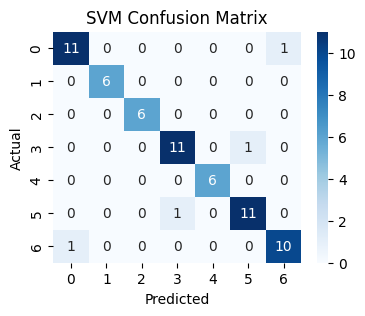

----------------------------
Accuracy: 0.8923
Precision: 0.8944
Recall: 0.8923
F1 score: 0.8907


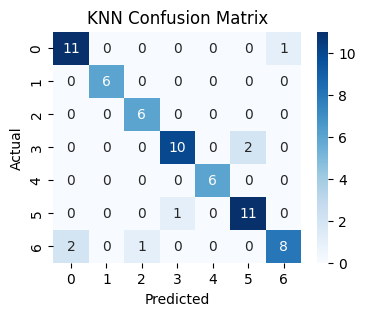

----------------------------
Accuracy: 0.9231
Precision: 0.9268
Recall: 0.9231
F1 score: 0.9234


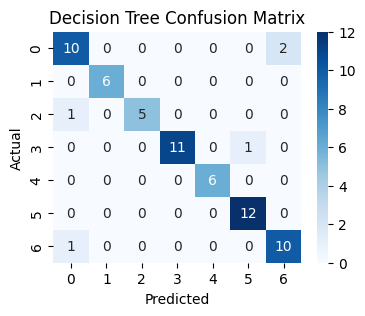

----------------------------
Accuracy: 0.8308
Precision: 0.8350
Recall: 0.8308
F1 score: 0.8248


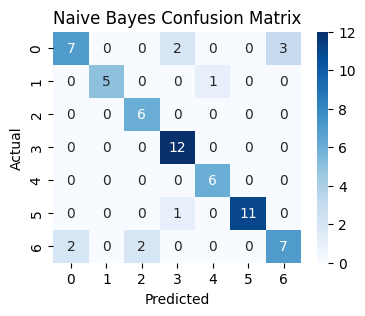

----------------------------
Accuracy: 0.9231
Precision: 0.9239
Recall: 0.9231
F1 score: 0.9229


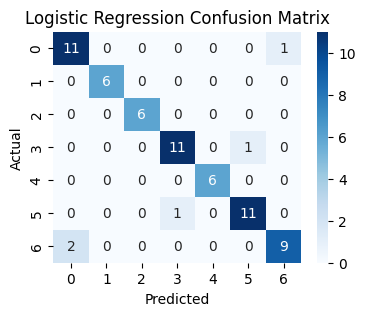

----------------------------
Accuracy: 0.9231
Precision: 0.9261
Recall: 0.9231
F1 score: 0.9200


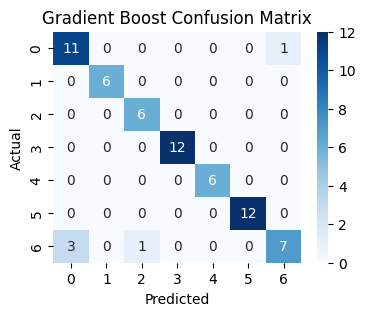

In [8]:
x = df.drop(columns=['volume', 'substance'])
y = df['substance']

sub_accuracies, sub_precisions, sub_recalls, sub_f1_scores = models.train_single_models(x, y, 42)

### Model Comparison

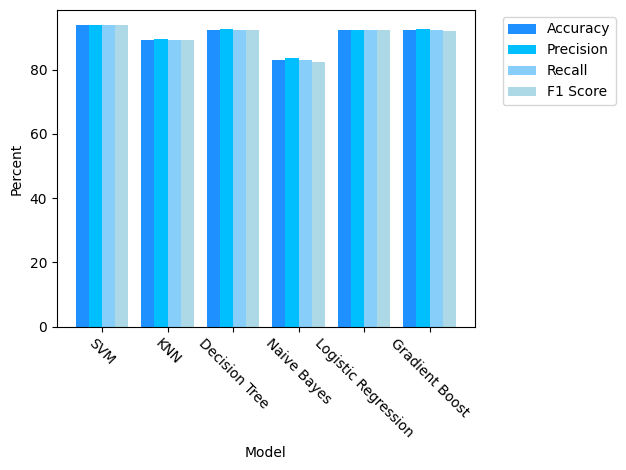

In [9]:
results.plot_single_models(sub_accuracies, sub_precisions, sub_recalls, sub_f1_scores)

### Volume

----------------------------
Accuracy: 0.8923
Precision: 0.8922
Recall: 0.8923
F1 score: 0.8920


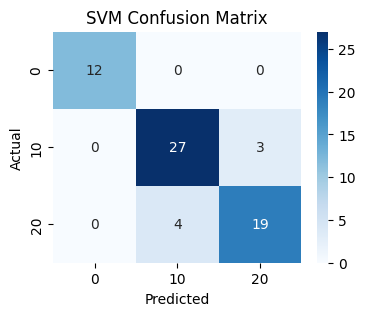

----------------------------
Accuracy: 0.9692
Precision: 0.9712
Recall: 0.9692
F1 score: 0.9690


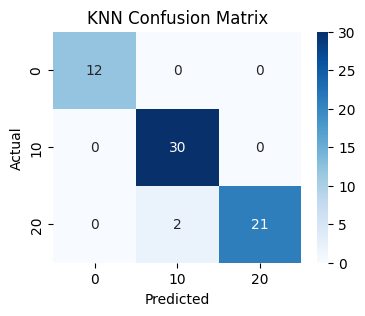

----------------------------
Accuracy: 0.8308
Precision: 0.8336
Recall: 0.8308
F1 score: 0.8300


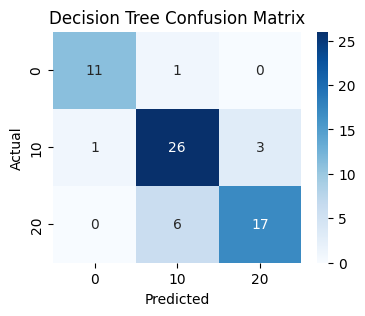

----------------------------
Accuracy: 0.7077
Precision: 0.7027
Recall: 0.7077
F1 score: 0.6985


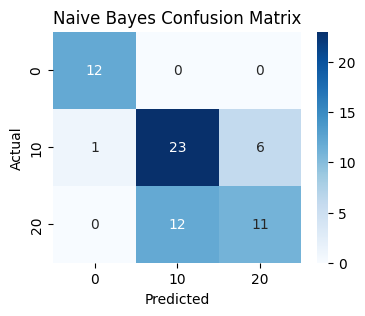

----------------------------
Accuracy: 0.8923
Precision: 0.8947
Recall: 0.8923
F1 score: 0.8911


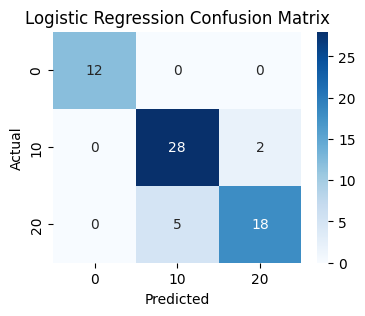

----------------------------
Accuracy: 0.9538
Precision: 0.9541
Recall: 0.9538
F1 score: 0.9537


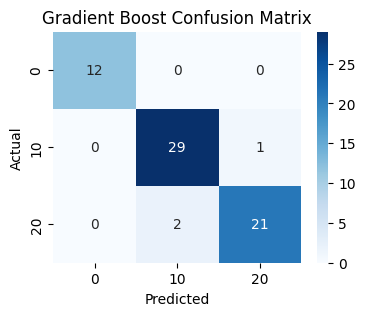

In [10]:
y = df['volume']

vol_accuracies, vol_precisions, vol_recalls, vol_f1_scores = models.train_single_models(x, y, 42)

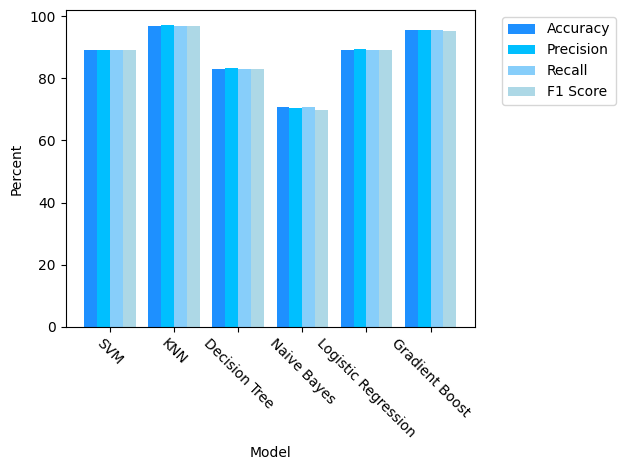

In [11]:
results.plot_single_models(vol_accuracies, vol_precisions, vol_recalls, vol_f1_scores)

# Multi Label Classification

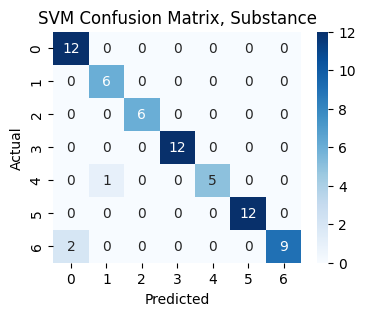

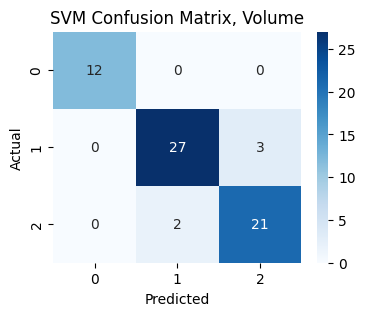

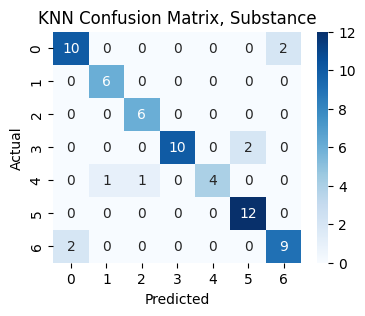

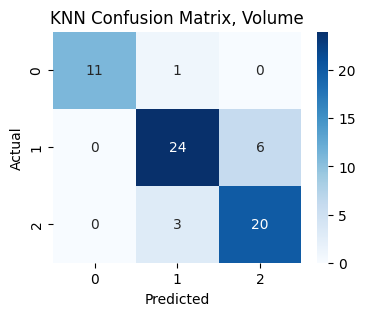

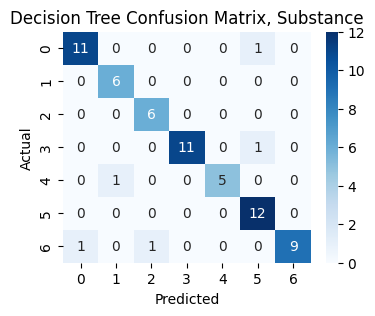

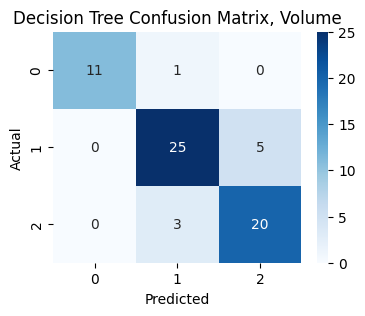

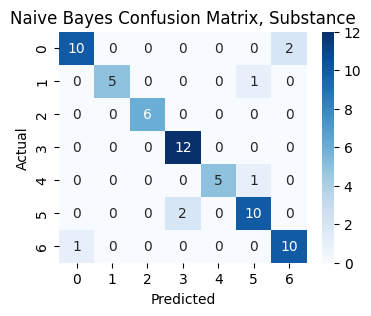

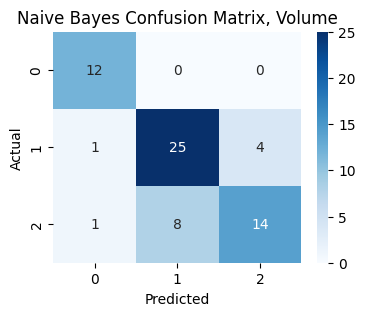

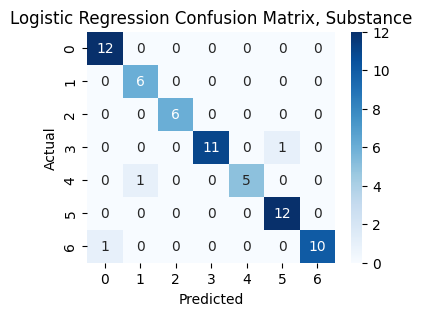

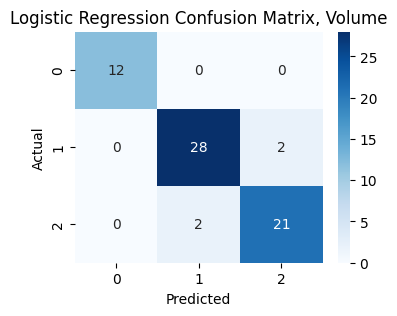

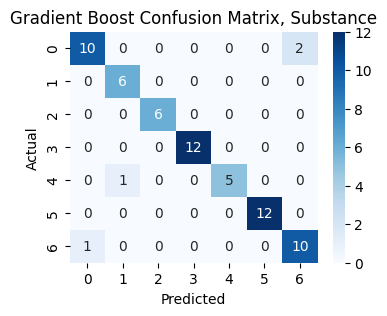

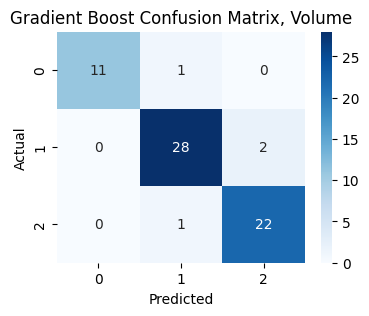

SVM
Exact Match Accuracy: 90.7692
Per-Label Accuracies: [95.38461538 92.30769231]
----------------------------
KNN
Exact Match Accuracy: 80.0000
Per-Label Accuracies: [87.69230769 84.61538462]
----------------------------
Decision Tree
Exact Match Accuracy: 81.5385
Per-Label Accuracies: [92.30769231 86.15384615]
----------------------------
Naive Bayes
Exact Match Accuracy: 70.7692
Per-Label Accuracies: [89.23076923 78.46153846]
----------------------------
Logistic Regression
Exact Match Accuracy: 90.7692
Per-Label Accuracies: [95.38461538 93.84615385]
----------------------------
Gradient Boost
Exact Match Accuracy: 90.7692
Per-Label Accuracies: [93.84615385 93.84615385]
----------------------------


In [12]:
y = df[['substance', 'volume']]
exact_accuracies, label_accuracies = models.train_multioutput_models(x, y, 42, True, True)

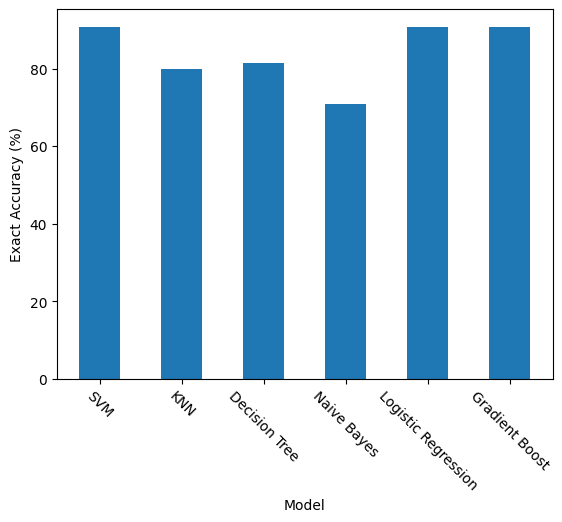

In [13]:
results.plot_accuracy(exact_accuracies)

In [14]:
import csv

output_path = r'C:\Users\chloe\OneDrive\Desktop\swallow EMG\outputs\classification\bandpass_accuracies.csv'

with open(output_path, 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(exact_accuracies)